# Intro to Neural Networks Assignment

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
### Hidden Layer:
### Output Layer:
### Neuron:
### Weight:
### Activation Function:
### Node Map:
### Perceptron:


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
class PerceptronClassifier():
    """
    Basic perceptron class for binary classification
    """
    def __init__(self, learning_rate=0.1, n_iter=100, tolerance=0.000001):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.tolerance = tolerance
    
    def fit(self, X, y):
        """
        Fit perceptron to a set of training data using gradient descent
        """
        # initialize weights and cost list
        self.weights_ = np.random.uniform(-0.01, 0.01, X.shape[1] + 1)
        self.costs_ = []
        # iterate until fit is adequate
        for i in range(self.n_iter):
            preds = self.predict_proba(X)
            errors = preds - y
            cost = np.sum(errors ** 2)
            self.costs_.append(cost)
            gradient = np.dot(X.T, errors)
            self.weights_[1:] -= self.learning_rate * gradient
            self.weights_[0] -= np.mean(errors)
            
            # break the loop if we are close enough
            if cost < self.tolerance:
                break
            
        return self
    
    def predict_proba(self, X):
        """
        Computes sigmoid output value given X
        """
        return 1. / (1. + np.exp(-(np.dot(X, self.weights_[1:]) + self.weights_[0])))
    
    def predict(self, X):
        """
        Predicts the binary class of X values
        """
        return np.where(self.predict_proba(X)>=0.5, 1, 0)
    
    def show_loss(self):
        """
        Shows loss along epochs
        """
        try:
            iters = range(len(self.costs_))
            fig, ax = plt.subplots()
            ax.plot(iters, self.costs_)
            ax.set_xlabel('Number of Iterations')
            ax.set_ylabel('Training Loss (SSE)')
            ax.set_title('Training Loss')
            plt.show()
        except:
            print ('Please train me first :)')

In [102]:
X = np.array([[1,0,1],
            [1,1,1],
            [0,0,1],
            [0,1,1]])
y = np.array([1,1,0,0])

ppn = PerceptronClassifier(learning_rate = 1.0, n_iter=100)
ppn.fit(X, y)
ppn.predict(X)

array([1, 1, 0, 0])

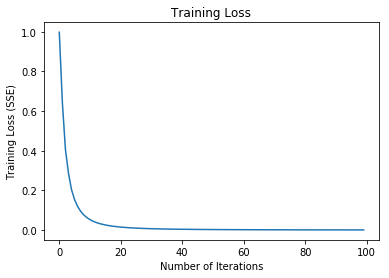

In [103]:
ppn.show_loss()

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?